# Optimized occulter, based on trapeze functions basis.

In [9]:
import cupy as cp
from poly import *
from fresnel import *
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline

/tmp/ipykernel_997517/4176183960.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


### Use free GPU ! Check device number with nvidia-smi

In [2]:
cp.cuda.Device(1).use()

<CUDA Device 1>

### Create trapeze petal occulter structure

In [6]:
n = 2000
print('Creating petal with %d points'%(n*2*24))
p = petal_FT(n_petals=24, n_border=n,profile_type='trapeze',profile_path='Matlab_files/Param_PourOc.mat')


Creating petal with 48000 points


### Visualize radial transmission profile

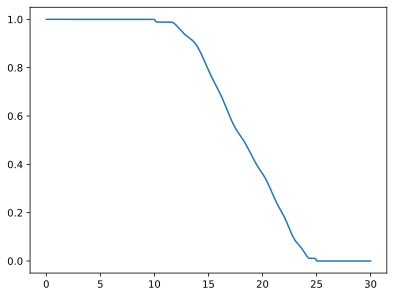

In [7]:
r=np.linspace(0,30,10001)
plt.plot(r,p.profile(r))

### Create diffraction structure. Compute Fresnel quadratic phase filter

In [8]:
m = 2**13
diff = diffraction(p,m)
diff.compute_fresnel_filter()

### Compute Fourier transform of polygonal approximation of petal occulter boundary

In [20]:
diff.compute_polygonal_fmask()

nslices =  14386
Processing slice number 0 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 1 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 2 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 3 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 4 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 5 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 6 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 7 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 8 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 9 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 10 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 11 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 12 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 13 out of 14386
shape of wi is  (

### Compute diffraction pattern by convolution using Fourier grid 

In [25]:
diff.compute_diffraction_patterns()

Cuda is on !


### Visualize mask Fourier transform

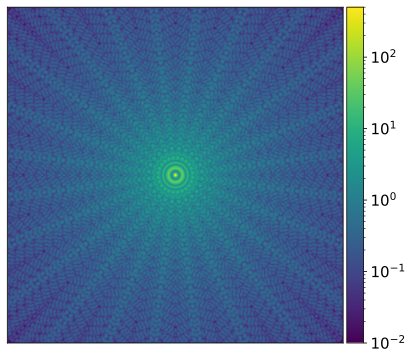

In [27]:
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
fmask = diff.polygonal_fmask
nzoom = 1000
fig,ax=plt.subplots(1,1,figsize=(6.4,4.8*1.4))
im0=ax.imshow(np.abs(fmask.real[4096-nzoom:4096+nzoom,4096-nzoom:4096+nzoom]),norm=colors.LogNorm(vmax=500,vmin=1e-2))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.setp(ax,xticks=[],yticks=[])
cbar=fig.colorbar(im0, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=15)

### Visualize petal occulter

In [10]:
fig,ax = plt.subplots(1,1,figsize=(6.8,6.8))
ax.scatter(diff.petal.Gamma[:,0],diff.petal.Gamma[:,1],s=1)
ax.set_title('Trapeze optimized occulter with %d petals'%diff.petal.n_petals, fontsize=10)

Text(0.5, 1.0, 'Trapeze optimized occulter with 24 petals')

### Visualize diffracted intensity profile at telescope aperture

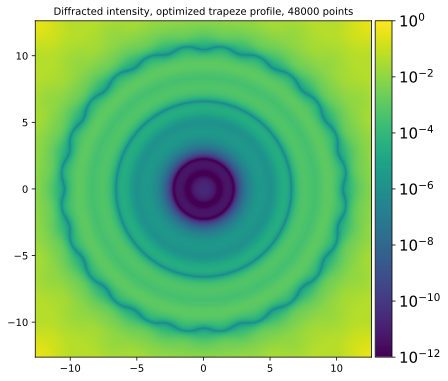

In [37]:
diffracted = diff.diffracted
nzoom = 512
fig,ax=plt.subplots(1,1,figsize=(6.4,4.8*1.4))
L = diff.petal.L * nzoom/4096
ext = [-L,L,-L,L]
im0=ax.imshow(np.abs(diffracted.real[4096-nzoom:4096+nzoom,4096-nzoom:4096+nzoom])**2,
              norm=colors.LogNorm(vmax=1,vmin=1e-12), extent=ext)
ax.set_title('Diffracted intensity, optimized trapeze profile, %d points'%(diff.petal.n_border*48), fontsize=10)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
#plt.setp(ax,xticks=[],yticks=[])
cbar=fig.colorbar(im0, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=15)